In [39]:
import sys
sys.path.append('..')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import logging
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from ase import Atoms
from ase.io import read

from m_ff.configurations import carve_confs
from m_ff.models import TwoBodySingleSpeciesModel, ThreeBodySingleSpeciesModel, CombinedSingleSpeciesModel

logging.basicConfig(level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [58]:
# Parameters
directory = Path('data/BIP_300/')
r_cut = 8.5
sigma_2b = 0.3
sigma_3b = 1.2
noise = 0.0001

# GP Parameters
ntr = 5
ntest = 10

# mapping
grid_start = 1.5
num_2b = 100
num_3b = 5

## Configurations

In [59]:
# # ----------------------------------------
# # Construct a configuration database
# # ----------------------------------------


n_data = 500

filename = directory / 'movie.xyz'

traj = read(filename, index=slice(None), format='extxyz')

elements, confs, forces, energies = carve_confs(
    traj, r_cut, n_data,
    forces_label='force', energy_label='energy')

if not os.path.exists(directory):
    os.makedirs(directory)

np.save('{}/confs_cut={:.2f}.npy'.format(directory, r_cut), confs)
np.save('{}/forces_cut={:.2f}.npy'.format(directory, r_cut), forces)
np.save('{}/energies_cut={:.2f}.npy'.format(directory, r_cut), energies)

lens = [len(conf) for conf in confs]

logging.info('\n'.join((
    'Number of atoms in a configuration:',
    '   maximum: {}'.format(np.max(lens)),
    '   minimum: {}'.format(np.min(lens)),
    '   average: {:.4}'.format(np.mean(lens))
)))

INFO:root:Reading traj step 0
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 4
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 5
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 6
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 7
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 8
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 9
INFO:root:Energy in the xyz file is not pre

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 48
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 49
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 50
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 51
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 52
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 53
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 54
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 55
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 56
INFO:root:Energy in the xyz file is not present, or is not calle

INFO:root:Reading traj step 95
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 96
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 97
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 98
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 99
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 100
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 101
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 102
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 103
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 104
INFO:root:Energy in the xyz 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 143
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 144
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 145
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 146
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 147
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 148
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 149
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 150
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 151
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 190
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 191
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 192
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 193
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 194
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 195
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 196
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 197
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 198
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 237
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 238
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 239
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 240
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 241
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 242
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 243
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 244
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 245
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 246
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 285
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 286
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 287
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 288
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 289
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 290
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 291
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 292
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 293
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 332
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 333
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 334
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 335
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 336
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 337
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 338
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 339
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 340
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 379
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 380
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 381
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 382
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 383
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 384
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 385
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 386
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 387
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 388
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 427
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 428
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 429
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 430
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 431
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 432
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 433
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 434
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 435
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 474
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 475
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 476
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 477
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 478
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 479
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 480
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 481
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 482
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 521
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 522
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 523
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 524
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 525
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 526
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 527
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 528
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 529
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 530
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 569
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 570
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 571
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 572
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 573
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 574
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 575
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 576
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 577
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 616
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 617
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 618
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 619
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 620
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 621
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 622
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 623
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 624
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 663
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 664
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 665
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 666
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 667
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 668
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 669
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 670
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 671
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 672
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 711
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 712
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 713
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 714
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 715
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 716
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 717
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 718
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 719
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 758
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 759
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 760
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 761
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 762
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 763
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 764
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 765
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 766
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 805
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 806
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 807
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 808
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 809
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 810
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 811
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 812
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 813
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 814
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 853
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 854
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 855
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 856
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 857
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 858
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 859
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 860
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 861
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 900
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 901
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 902
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 903
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 904
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 905
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 906
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 907
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 908
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 947
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 948
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 949
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 950
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 951
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 952
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 953
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 954
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 955
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 956
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 995
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 996
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 997
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 998
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 999
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1000
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1001
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1002
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1003
INFO:root:Energy in the xyz file is not present, or

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1042
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1043
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1044
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1045
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1046
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1047
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1048
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1049
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1050
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1089
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1090
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1091
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1092
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1093
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1094
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1095
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1096
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1097
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1136
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1137
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1138
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1139
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1140
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1141
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1142
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1143
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1144
INFO:root:Energy in the xyz file is not presen

INFO:root:Reading traj step 1182
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1183
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1184
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1185
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1186
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1187
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1188
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1189
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1190
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1191
INFO:root:Ene

INFO:root:Reading traj step 1229
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1230
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1231
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1232
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1233
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1234
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1235
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1236
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1237
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1238
INFO:root:Ene

INFO:root:Reading traj step 1276
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1277
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1278
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1279
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1280
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1281
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1282
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1283
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1284
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1285
INFO:root:Ene

INFO:root:Reading traj step 1323
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1324
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1325
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1326
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1327
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1328
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1329
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1330
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1331
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1332
INFO:root:Ene

INFO:root:Reading traj step 1370
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1371
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1372
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1373
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1374
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1375
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1376
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1377
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1378
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1379
INFO:root:Ene

INFO:root:Reading traj step 1417
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1418
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1419
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1420
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1421
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1422
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1423
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1424
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1425
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1426
INFO:root:Ene

INFO:root:Reading traj step 1464
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1465
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1466
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1467
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1468
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1469
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1470
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1471
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1472
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1473
INFO:root:Ene

INFO:root:Reading traj step 1511
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1512
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1513
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1514
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1515
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1516
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1517
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1518
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1519
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1520
INFO:root:Ene

INFO:root:Reading traj step 1558
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1559
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1560
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1561
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1562
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1563
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1564
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1565
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1566
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1567
INFO:root:Ene

INFO:root:Reading traj step 1605
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1606
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1607
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1608
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1609
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1610
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1611
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1612
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1613
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1614
INFO:root:Ene

INFO:root:Reading traj step 1652
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1653
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1654
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1655
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1656
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1657
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1658
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1659
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1660
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1661
INFO:root:Ene

INFO:root:Reading traj step 1699
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1700
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1701
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1702
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1703
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1704
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1705
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1706
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1707
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1708
INFO:root:Ene

INFO:root:Reading traj step 1746
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1747
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1748
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1749
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1750
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1751
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1752
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1753
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1754
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1755
INFO:root:Ene

INFO:root:Reading traj step 1793
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1794
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1795
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1796
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1797
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1798
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1799
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1800
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1801
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1802
INFO:root:Ene

INFO:root:Reading traj step 1840
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1841
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1842
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1843
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1844
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1845
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1846
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1847
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1848
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1849
INFO:root:Ene

INFO:root:Reading traj step 1887
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1888
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1889
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1890
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1891
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1892
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1893
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1894
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1895
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1896
INFO:root:Ene

INFO:root:Reading traj step 1934
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1935
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1936
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1937
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1938
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1939
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1940
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1941
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1942
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1943
INFO:root:Ene

INFO:root:Reading traj step 1981
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1982
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1983
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1984
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1985
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1986
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1987
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1988
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1989
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1990
INFO:root:Ene

INFO:root:Reading traj step 2028
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2029
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2030
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2031
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2032
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2033
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2034
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2035
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2036
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2037
INFO:root:Ene

INFO:root:Reading traj step 2075
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2076
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2077
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2078
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2079
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2080
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2081
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2082
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2083
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2084
INFO:root:Ene

INFO:root:Reading traj step 2122
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2123
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2124
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2125
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2126
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2127
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2128
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2129
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2130
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2131
INFO:root:Ene

INFO:root:Reading traj step 2169
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2170
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2171
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2172
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2173
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2174
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2175
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2176
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2177
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2178
INFO:root:Ene

INFO:root:Reading traj step 2216
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2217
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2218
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2219
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2220
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2221
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2222
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2223
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2224
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2225
INFO:root:Ene

INFO:root:Reading traj step 2263
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2264
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2265
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2266
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2267
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2268
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2269
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2270
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2271
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2272
INFO:root:Ene

INFO:root:Reading traj step 2310
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2311
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2312
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2313
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2314
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2315
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2316
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2317
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2318
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2319
INFO:root:Ene

INFO:root:Reading traj step 2357
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2358
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2359
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2360
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2361
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2362
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2363
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2364
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2365
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2366
INFO:root:Ene

INFO:root:Reading traj step 2404
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2405
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2406
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2407
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2408
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2409
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2410
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2411
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2412
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2413
INFO:root:Ene

INFO:root:Reading traj step 2451
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2452
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2453
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2454
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2455
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2456
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2457
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2458
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2459
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2460
INFO:root:Ene

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2498
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2499
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2500
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2501
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2502
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2503
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2504
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2505
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2506
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2545
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2546
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2547
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2548
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2549
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2550
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2551
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2552
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2553
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2592
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2593
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2594
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2595
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2596
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2597
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2598
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2599
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2600
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2639
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2640
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2641
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2642
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2643
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2644
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2645
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2646
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2647
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2686
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2687
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2688
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2689
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2690
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2691
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2692
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2693
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2694
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2733
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2734
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2735
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2736
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2737
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2738
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2739
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2740
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2741
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2780
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2781
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2782
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2783
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2784
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2785
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2786
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2787
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2788
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2827
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2828
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2829
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2830
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2831
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2832
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2833
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2834
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2835
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2874
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2875
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2876
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2877
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2878
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2879
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2880
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2881
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2882
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2921
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2922
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2923
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2924
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2925
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2926
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2927
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2928
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2929
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2968
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2969
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2970
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2971
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2972
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2973
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2974
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2975
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2976
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3015
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3016
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3017
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3018
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3019
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3020
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3021
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3022
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3023
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3062
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3063
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3064
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3065
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3066
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3067
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3068
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3069
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3070
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3109
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3110
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3111
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3112
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3113
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3114
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3115
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3116
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3117
INFO:root:Energy in the xyz file is not presen

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3156
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3157
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3158
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3159
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3160
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3161
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3162
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3163
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3164
INFO:root:Energy in the xyz file is not presen

In [60]:
# Get configurations and forces from file
confs = np.load(directory / 'confs_cut={:.2f}.npy'.format(r_cut))
forces = np.load(directory / 'forces_cut={:.2f}.npy'.format(r_cut))
numconfs = len(forces)
ind = np.arange(numconfs)
ind_tot = np.random.choice(ind, size=ntr + ntest, replace=False)

# Separate into random testing and training dataset
# tr_confs, tr_forces = confs[ind[:ntr]], forces[ind[:ntr]]
# tst_confs, tst_forces = confs[ind[ntr:]], forces[ind[ntr:]]

# Use fixed training and testing dataset
tr_confs, tr_forces = confs[:ntr], forces[:ntr]
tst_confs, tst_forces = confs[-ntest - 1:-1], forces[-ntest - 1:-1]

## GP - 2+3 body

In [61]:
# model_c = CombinedSingleSpeciesModel(elementslist[0], r_cut, sigma_2b, sigma_3b, r_cut / 10.0, r_cut / 10.0, noise)
model_c = ThreeBodySingleSpeciesModel(elements[0], r_cut, sigma_3b, r_cut / 10.0, noise)
# model_c = TwoBodySingleSpeciesModel(elementslist[0], r_cut, sigma_2b, r_cut / 10.0, noise)

INFO:m_ff.kernels.threebodykernel:Started compilation of theano three body kernels
INFO:m_ff.kernels.threebodykernel:Ended compilation of theano three body kernels


In [63]:
model_c.fit(tr_confs, tr_forces)

In [64]:
# Test the GP performance
print('Testing GP')

gp_forces = np.zeros((ntest, 3))
gp_error = np.zeros((ntest, 3))

for i in np.arange(ntest):
    gp_forces[i, :] = model_c.predict(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i, :] = gp_forces[i, :] - tst_forces[i, :]

MAEF = np.mean(np.sqrt(np.sum(np.square(gp_error), axis=1)))
SMAEF = np.std(np.sqrt(np.sum(np.square(gp_error), axis=1)))

MF = np.mean(np.linalg.norm(tst_forces, axis=1))

print('MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF, SMAEF))
print('Relative MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF / MF, SMAEF / MF))

Testing GP
MAEF on forces: 0.7952 +- 0.2912
Relative MAEF on forces: 1.5625 +- 0.5721


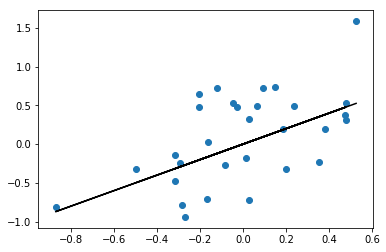

In [66]:
plt.scatter(tst_forces, gp_forces)
plt.plot(tst_forces, tst_forces, 'k-')
plt.show()

## Mapping

In [68]:
# model_c.build_grid(grid_start, num_2b, num_3b)
model_c.build_grid(grid_start, 5)

In [69]:
def rmse(x1, x2):
    rms = np.sqrt(np.sum(np.square(x1 - x2), axis=1))
    return np.mean(rms), np.std(rms)

## Test mapping on traj

In [73]:
from m_ff.calculators import TwoBodySingleSpecies, ThreeBodySingleSpecies, CombinedSingleSpecies
# calc = CombinedSingleSpecies(r_cut, model_c.grid[(26, 26)], model_c.grid[(26, 26, 26)], rep_alpha = 1.5)
# calc = TwoBodySingleSpecies(r_cut, model_c.grid[(26, 26)], rep_alpha = 1.5)
calc = ThreeBodySingleSpecies(r_cut, model_c.grid[(28, 28, 28)])

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 10))
for atoms in traj:
    atoms.set_cell(21.0*np.identity(3))
    atoms.set_calculator(calc)

    #rms_mean, rms_std = rmse(atoms.arrays['force'], atoms.get_forces())
    #print('MAEF on forces: {:.4f} +- {:.4f}'.format(rms_mean, rms_std))
    print(atoms.get_forces())


INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


[[-8.64350822e-01 -1.15387207e+00 -2.57664237e-01]
 [-5.58107139e-02 -2.26414629e-02  1.63124419e-02]
 [-1.19146454e+00  8.59587725e-01  1.80104018e-01]
 [ 6.65949697e-04 -5.43409615e-02 -2.95805355e-02]
 [-1.67045647e-03  3.22567142e-04  2.07891957e-04]
 [ 1.11788328e-03  6.09674580e-02 -4.27894816e-03]
 [ 1.18786942e+00 -8.54360412e-01 -1.77252062e-01]
 [ 5.82798330e-02  1.34574759e-02  1.83353500e-02]
 [ 8.59987896e-01  1.15177276e+00  2.59320823e-01]
 [-4.32788052e-02 -3.48936602e-02  2.81559822e-02]
 [-4.44887286e-02  2.87387479e-03  4.34927541e-02]
 [ 4.32874424e-02 -2.55801838e-02  4.05633903e-02]
 [ 4.08986693e-02  2.23450964e-02  4.03008019e-02]
 [-1.88274232e-02 -3.18816524e-01  1.44024395e+00]
 [-9.59387589e-03 -4.17878376e-02 -4.55455785e-02]
 [-2.21952299e-02  5.05722991e-02 -3.45286496e-02]
 [ 2.53161644e-02 -2.86736176e-02 -5.13345752e-02]
 [ 1.46455097e-02  5.60135688e-02 -2.44047460e-02]
 [ 1.96118252e-02  3.17053903e-01 -1.44244807e+00]]
[[-0.87271798 -1.1778087  -0.1

## Run simple dynamics

In [74]:
# Global Variables Definition
gamma = 0.001
temp = 300 #K
dt = 3.0  # fs
steps = 1000
t = steps * dt * 10 ** (-3)  # time in ps

In [75]:
atoms = traj[4]
atoms.set_pbc(False)
atoms.set_cell([(21, 0, 0), (0, 21, 0), (0, 0, 21)])
atoms.set_calculator(calc)

In [76]:
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.velocitydistribution import Stationary
from ase.md.velocitydistribution import ZeroRotation
from ase.md.verlet import VelocityVerlet
from ase.md.langevin import Langevin
from ase import units

Stationary(atoms)
ZeroRotation(atoms)
dyn = VelocityVerlet(atoms, dt * units.fs)
MaxwellBoltzmannDistribution(atoms, temp * units.kB)

In [77]:
def printenergy(a=atoms):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))
    
def printforces(a=atoms):
    forces = a.get_forces()
    print(forces)

In [78]:
import scipy as sp
pos = atoms.get_positions()
dist = np.reshape(sp.spatial.distance.cdist(pos, pos), len(pos)**2)


In [80]:
printenergy(atoms)
for i in range(100):
    dyn.run(1)
    printenergy(atoms)


ValueError: A value in x is below the interpolation range.

## EAM Testing

In [16]:
from ase.calculators.eam import EAM

from ase.build import bulk

# test to generate an EAM potential file using a simplified
# approximation to the Mishin potential Al99.eam.alloy data

from scipy.interpolate import InterpolatedUnivariateSpline as spline

cutoff = 10.0

n = 21
rs = np.arange(0, n) * (cutoff / n)
rhos = np.arange(0, 2, 2. / n)

# generated from
# mishin = EAM(potential='../potentials/Al99.eam.alloy')
# m_density = mishin.electron_density[0](rs)
# m_embedded = mishin.embedded_energy[0](rhos)
# m_phi = mishin.phi[0,0](rs)

m_density = np.array([2.78589606e-01, 2.02694937e-01, 1.45334053e-01,
                      1.06069912e-01, 8.42517168e-02, 7.65140344e-02,
                      7.76263116e-02, 8.23214224e-02, 8.53322309e-02,
                      8.13915861e-02, 6.59095390e-02, 4.28915711e-02,
                      2.27910928e-02, 1.13713167e-02, 6.05020311e-03,
                      3.65836583e-03, 2.60587564e-03, 2.06750708e-03,
                      1.48749693e-03, 7.40019174e-04, 6.21225205e-05])

m_embedded = np.array([1.04222211e-10, -1.04142633e+00, -1.60359806e+00,
                       -1.89287637e+00, -2.09490167e+00, -2.26456628e+00,
                       -2.40590322e+00, -2.52245359e+00, -2.61385603e+00,
                       -2.67744693e+00, -2.71053295e+00, -2.71110418e+00,
                       -2.69287013e+00, -2.68464527e+00, -2.69204083e+00,
                       -2.68976209e+00, -2.66001244e+00, -2.60122024e+00,
                       -2.51338548e+00, -2.39650817e+00, -2.25058831e+00])

m_phi = np.array([6.27032242e+01, 3.49638589e+01, 1.79007014e+01,
                  8.69001383e+00, 4.51545250e+00, 2.83260884e+00,
                  1.93216616e+00, 1.06795515e+00, 3.37740836e-01,
                  1.61087890e-02, -6.20816372e-02, -6.51314297e-02,
                  -5.35210341e-02, -5.20950200e-02, -5.51709524e-02,
                  -4.89093894e-02, -3.28051688e-02, -1.13738785e-02,
                  2.33833655e-03, 4.19132033e-03, 1.68600692e-04])

m_densityf = spline(rs, m_density)
m_embeddedf = spline(rhos, m_embedded)
m_phif = spline(rs, m_phi)

mishin_approx = EAM(elements=['Ni'], embedded_energy=np.array([m_embeddedf]),
                    electron_density=np.array([m_densityf]),
                    phi=np.array([[m_phif]]), cutoff=cutoff, form='alloy',
                    # the following terms are only required to write out a file
                    Z=[13], nr=n, nrho=n, dr=cutoff / n, drho=2. / n,
                    lattice=['fcc'], mass=[58.692], a=[2.58])

atoms.set_calculator(calc)

In [48]:
dyn.run(steps)

## Pairwise potential test

In [50]:
model_2b = TwoBodySingleSpeciesModel(elementslist[0], r_cut, sigma_2b, r_cut / 10.0, noise)
model_2b.fit(tr_confs, tr_forces)

INFO:m_ff.kernels.twobody:Started compilation of theano two body single species kernels
INFO:m_ff.kernels.twobody:Ended compilation of theano two body single species kernels


In [51]:
# Test the GP performance
print('Testing GP')

gp_forces = np.zeros((ntest, 3))
gp_error = np.zeros((ntest, 3))

for i in np.arange(ntest):
    gp_forces[i, :] = model_2b.predict(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i, :] = gp_forces[i, :] - tst_forces[i, :]

MAEF = np.mean(np.sqrt(np.sum(np.square(gp_error), axis=1)))
SMAEF = np.std(np.sqrt(np.sum(np.square(gp_error), axis=1)))

MF = np.mean(np.linalg.norm(tst_forces, axis=1))

print('MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF, SMAEF))
print('Relative MAEF on forces: {:.4f} +- {:.4f}'.format(MAEF / MF, SMAEF / MF))

Testing GP
MAEF on forces: 0.1404 +- 0.0750
Relative MAEF on forces: 0.1943 +- 0.1038


In [52]:
grid_2b = model_2b.build_grid(grid_start, num_2b)


In [53]:
calc = TwoBodySingleSpecies(r_cut, grid_c_2b)
atoms.set_calculator(calc)

In [54]:
dyn.run(steps)

INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize
